In [1]:
!pip3 install jupyter-tabnine
!jupyter nbextension install --py jupyter_tabnine
!jupyter nbextension enable --py jupyter_tabnine
!jupyter serverextension enable --py jupyter_tabnine

Installing C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\jupyter_tabnine\static -> jupyter_tabnine
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\main.css
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\main.js
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\README.md
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\tabnine.yaml
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable jupyter_tabnine --py
    
Enabling notebook extension jupyter_tabnine/main...
      - Validating: ok
Enabling: jupyter_tabnine
- Writing config: C:\Users\ASUS\.jupyter
    - Validating...
      jupyter_tabnine  ok


In [72]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
diab_PATH1="../../DATASETS/ML_Training/diabetes.csv"

In [44]:
data=pd.read_csv(diab_PATH1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
data.shape

(768, 9)

In [46]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
x=data.iloc[:,:-1]
y=data.iloc[::,-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [48]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=200)
print(X_train.shape," ",X_test.shape," ",Y_train.shape," ",Y_test.shape)

(614, 8)   (154, 8)   (614,)   (154,)


In [60]:
Kmodel=KNeighborsClassifier()
Kmodel.fit(X_train,Y_train)
predicted=Kmodel.predict(X_test)
print("Accuracy Score: ",round(accuracy_score(Y_test,predicted)*100))

Accuracy Score:  73


In [52]:
print("Accuracy Score: ",round(accuracy_score(Y_test,predicted)*100),"%")

Accuracy Score:  73 %


In [23]:
type(Y_test)

pandas.core.series.Series

In [25]:
predicted=pd.Series(predicted)

In [34]:
Y_test.replace([1,0],["Diabetes","No diabetes"],inplace=True)
predicted.replace([1,0],["Diabetes","No diabetes"],inplace=True)

In [35]:
cnfm = pd.crosstab(Y_test, predicted,rownames = ['True'],colnames = ['Predicted'])
cnfm

Predicted,Diabetes,No diabetes
True,,
Diabetes,3,6
No diabetes,6,13


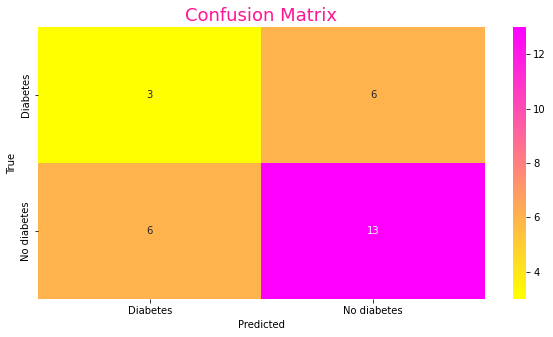

In [36]:
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix",fontsize = 18, color = "#FF1493")
sns.heatmap(cnfm,fmt="d",annot=True,cmap="spring_r")
plt.show()

In [37]:
cnfm1 = pd.crosstab(Y_test, predicted,rownames = ['True'],colnames = ['Predicted'],margins=True)

In [38]:
acc=(int(cnfm1.iloc[0,0])+int(cnfm1.iloc[1,1]))/sum(np.array(cnfm1)[:2,:2].flatten())

In [39]:
round(acc*100)

57

In [56]:
acc = []
nst = []
for i in range(5,301):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(X_train,Y_train)
    rfpred = rf.predict(X_test)
    acc.append(round(accuracy_score(Y_test,rfpred),4)*100)
    nst.append(i)
ind=acc.index(max(acc))
print("max accuracy of rf is {} for n_estimator {} ".format(acc[ind],nst[ind]))





bst = nst[ind]
crit = ["gini","entropy"]
accrit=[]
for i in crit:
    rfc = RandomForestClassifier(n_estimators = bst,criterion =i)
    rfc.fit(X_train,Y_train)
    rfcpred = rfc.predict(X_test)
    accrit.append(round(accuracy_score(Y_test,rfcpred),4)*100)
idx = accrit.index(max(accrit))
print("{} Criterion is providing highest accuracy by: {}".format(crit[idx],accrit[idx]))

max accuracy of rf is 85.06 for n_estimator 14 
entropy Criterion is providing highest accuracy by: 77.92


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
predictedscore=[]

In [100]:
Kmodel=KNeighborsClassifier()
Kmodel.fit(X_train,Y_train)
predicted=(Kmodel.predict(X_test))
predictedscore.append(round(accuracy_score(Y_test,predicted)*100))

In [101]:
Rmodel=RandomForestClassifier()
Rmodel.fit(X_train,Y_train)
predicted=Rmodel.predict(X_test)
# print("Accuracy Score: ",round(accuracy_score(Y_test,predicted)*100))
predictedscore.append(round(accuracy_score(Y_test,predicted)*100))

In [102]:
Lmodel=LogisticRegression()
Lmodel.fit(X_train,Y_train)
predicted=Lmodel.predict(X_test)
predictedscore.append(round(accuracy_score(Y_test,predicted)*100))

In [103]:
Dmodel=DecisionTreeClassifier()
Dmodel.fit(X_train,Y_train)
predicted=Dmodel.predict(X_test)
predictedscore.append(round(accuracy_score(Y_test,predicted)*100))

In [104]:
classifier=['KNeighborsClassifier','RandomForestClassifier','LogisticRegression','DecisionTreeClassifier']

In [105]:
print(classifier)
predictedscore

['KNeighborsClassifier', 'RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier']


[73, 79, 82, 73]

In [106]:
df=pd.DataFrame({"Classifier":classifier,"score":predictedscore})
px.bar(df,x='Classifier',y='score',color='score',text='score')